In [227]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy import units as u
from astropy.analytic_functions import blackbody_lambda, blackbody_nu
%matplotlib inline

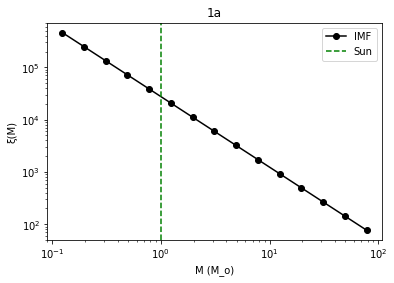

In [228]:
plt.axis()

α = 2.35
M1 = 0.1
M2 = 100
N = 1e6
ΔlogM = 0.2
ξ0 = 1.35 * N / ((M1**(-1.35))-(M2**(-1.35)))
bins = int((np.log10(M2) - np.log10(M1)) / ΔlogM)
M_bins = np.logspace(-1, 2, bins+1)
M = np.zeros(bins)
N = np.zeros(bins)
for i in range(15):
    M_min = M_bins[i]
    M_max = M_bins[i+1]
    M_bin = np.logspace(np.log10(M_min), np.log10(M_max), 100)
    N_bin = ξ0 * ((M_min**(-1.35))-(M_max**(-1.35))) / 1.35
    ξ_M = ξ0 * M_bin**(-α)
    M_tot = ξ0 * ((M_min**(-0.35))-(M_max**(-0.35))) / 0.35
    M_mean = M_tot / N_bin
    M[i] = M_mean
    N[i] = N_bin
    
    #rec = patches.Rectangle((M_min, 0.001), M_max-M_min, np.mean(ξ_M), color='b', fill=False)
    #plt.gca().add_patch(rec)
    
# Popultion of stars with M < M_o
Nsun = ξ0 * ((M1**(-1.35))-(1**(-1.35))) / 1.35
Msun = ξ0 * ((M1**(-0.35))-(1**(-0.35)))/0.35



plt.loglog(M, N, 'k-o', label='IMF')
plt.axvline(1, color='g', linestyle='--', label = 'Sun')
plt.xlabel('M (M_o)')
plt.ylabel('ξ(M)')
plt.title('1a')
plt.legend()

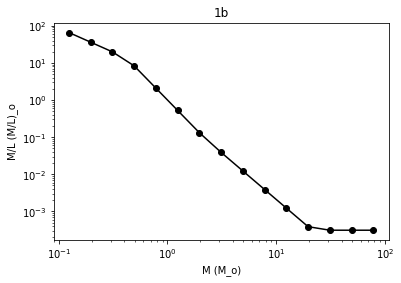

In [229]:
L = []
for m in M:
    if m < 0.43:
        L.append(0.23 * (m **2.3))
    elif 0.43 < m < 2:
        L.append(m**4)
    elif 2 < m < 20:
        L.append(1.5 * (m**3.5))
    elif m > 20:
        L.append(3200 * m)

L = np.array(L)
        
plt.loglog(M, M/L, 'k-o')
plt.xlabel('M (M_o)')
plt.ylabel('M/L (M/L)_o')
plt.title('1b')

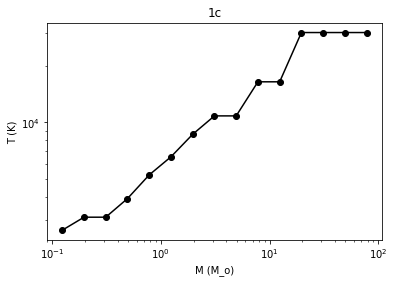

In [230]:
T_file = "TL.dat"
T_dat = Table.read(T_file, format='ascii')
T = np.zeros(len(L))

for i in range(len(L)):
    diff = L[i] - T_dat['L(L_sun)']
    ind = np.argmin(abs(diff))
    T[i]= T_dat['T(K)'][ind]
    
plt.loglog(M, T, 'ko-')
plt.xlabel('M (M_o)')
plt.ylabel('T (K)')
plt.title('1c')

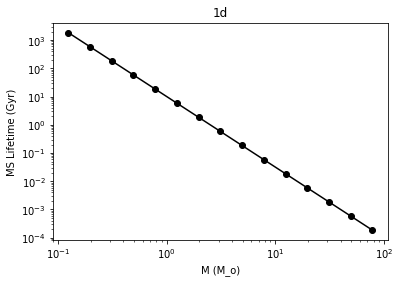

In [231]:
τ_sun = 10 #MS lifetime of the Sun in Gyrs
τ = τ_sun * M**(-2.5)
plt.loglog(M, τ, 'ko-')
plt.xlabel('M (M_o)')
plt.ylabel('MS Lifetime (Gyr)')
plt.title('1d')

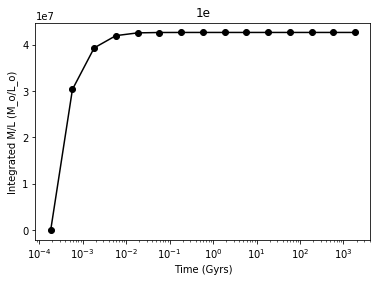

In [232]:
ML_t = np.zeros(bins)
for i in range(bins):
    ind = np.where(τ > τ[i])
    ML_t[i] = np.sum(M[ind]*N[ind]/L[ind])
    
plt.semilogx(τ[::-1], ML_t, 'ko-')
plt.xlabel('Time (Gyrs)')
plt.ylabel('Integrated M/L (M_o/L_o)')
plt.title('1e')

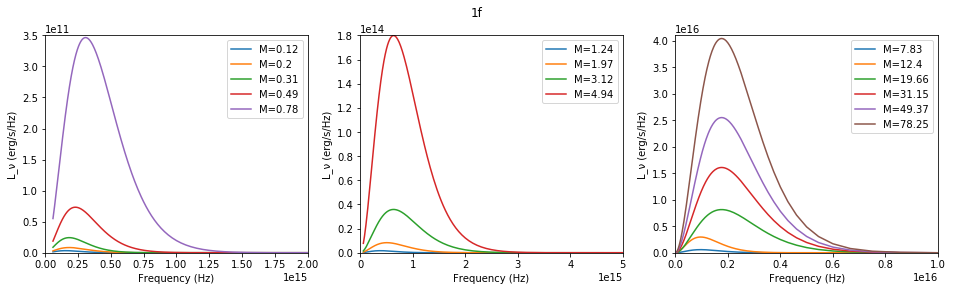

In [259]:
plt.figure(1, figsize=(16,4))

λ = np.linspace(10, 5000, 1000) * u.nm
ν = λ.to(u.Hz, equivalencies=u.spectral())
specs = []
for i in range(bins):
    temperature = T[i] * u.K
    flux_nu = blackbody_nu(λ, temperature)
    R = 695.7e8 * np.sqrt(L[i]) * ((5780/T[i]**2)) #radius of star wrt Sun (cm)
    L_ν = flux_nu * ((4*np.pi*R)**2)
    specs.append(L_ν)
    if i <= 4:
        plt.subplot(131)
        plt.plot(ν, L_ν, '-', label='M='+str(np.round(M[i], 2)))       
    elif i <= 8:
        plt.subplot(132)
        plt.plot(ν, L_ν, '-', label='M='+str(np.round(M[i], 2)))   
    else:
        plt.subplot(133)
        plt.plot(ν, L_ν, '-', label='M='+str(np.round(M[i], 2)))        

plt.subplot(131)       
plt.xlabel('Frequency (Hz)')
plt.ylabel('L_ν (erg/s/Hz)')
plt.legend()
plt.axis([0, 2e15, 0, 3.5e11])
plt.subplot(132)       
plt.xlabel('Frequency (Hz)')
plt.ylabel('L_ν (erg/s/Hz)')
plt.legend()
plt.axis([0, .5e16, 0, 1.8e14])
plt.subplot(133)
plt.xlabel('Frequency (Hz)')
plt.ylabel('L_ν (erg/s/Hz)')
plt.axis([0, 1e16, 0, 4.1e16])
plt.legend()
plt.suptitle('1f')


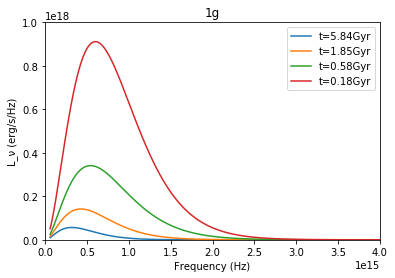

In [278]:
t_steps = τ[np.where((τ >=.1)&(τ<=13))]
int_specs = []
for i in range(len(t_steps)): 
    spec = 0
    ind = np.where(τ >= t_steps[i]) 
    for j in range(len(ind[0])):
        spec += specs[j] * N[j]
    int_specs.append(spec)

for i in range(len(t_steps)):
    plt.plot(ν, int_specs[i], label = 't='+str(np.round(t_steps[i], 2) )+"Gyr")
plt.xlabel('Frequency (Hz)')
plt.ylabel('L_ν (erg/s/Hz)')
plt.title('1g')
plt.axis([0, .4e16, 0, 1e18])
plt.legend()